In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [4]:
df = pd.read_csv('data/data.csv')

In [5]:
df.head(5)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


Text(0, 0.5, 'Height')

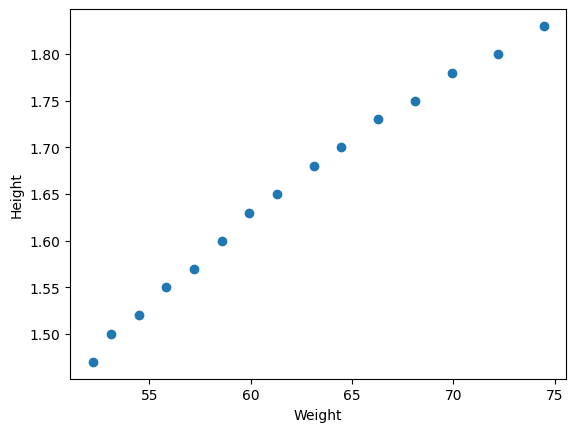

In [9]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [18]:
X = df[['Weight']]
y = df['Height']


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
#standarize the dataset independent data
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
regressor.coef_

array([0.10660963])

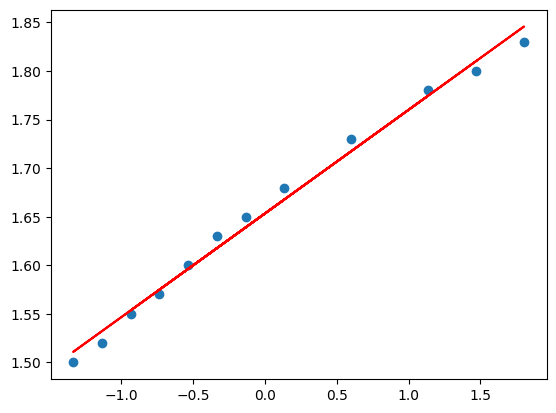

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

In [34]:
y_pred_test = regressor.predict(X_test)

In [35]:
y_pred_test, y_test

(array([1.68896884, 1.74593334, 1.49657634]),
 9     1.70
 11    1.75
 0     1.47
 Name: Height, dtype: float64)

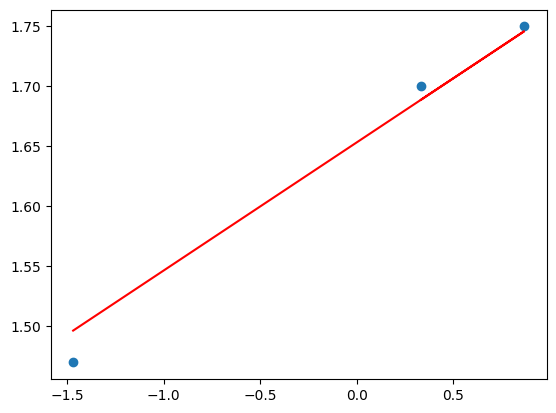

In [36]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

In [38]:
# METRICS

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
MSE = mean_squared_error(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(MSE)
print(MSE)
print(MAE)
print(RMSE)

0.0002815086785527751
0.013891386742554449
0.01677822036310094


In [43]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)


In [44]:
score

0.9810644386623694

In [45]:
#R2 AJUSTADO

In [47]:
#new data
scaled_weight = scaler.transform([[80]])

c:\Users\AngelClavellina\Documents\MLOps\HeightWeightprediction\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
scaled_weight

array([[2.62024309]])

In [50]:
regressor.predict(scaled_weight)

array([1.93267647])

In [172]:
dataset = pd.read_csv('data/Algerian_forest_fires_dataset.csv')

In [173]:
dataset.shape

(247, 14)

In [174]:
dataset.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [175]:
# Data Cleaning

In [176]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [177]:
dataset.loc[:122, "Region"]=0
dataset.loc[122:, "Regions"]=1

In [178]:
df = dataset

In [179]:
df.loc[df['Regions'].isnull(), 'Regions'] = 1

In [180]:
df.loc[df['Region'].isnull(), 'Region'] = 0

In [181]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Regions
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,1.0


In [182]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
Regions        0
dtype: int64

In [183]:
df[["Region"]] = df[["Region"]].astype(int)
df[["Regions"]] = df[["Regions"]].astype(int)

In [184]:
df = df.dropna().reset_index(drop=True)

In [185]:
df.shape

(244, 16)

In [186]:
df.columns = df.columns.str.strip()

In [187]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'Regions'],
      dtype='object')

In [188]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
Regions         int32
dtype: object

In [191]:

df = df.drop(122).reset_index(drop=True)

In [192]:
for col in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']:
    df[[col]] = df[[col]].astype(int)

In [193]:
objects = [features for features in df.columns if df[features].dtypes == 'O']

In [194]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [195]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [196]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Regions
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,1
5,6.0,6.0,2012.0,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0,1
6,7.0,6.0,2012.0,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0,1
7,8.0,6.0,2012.0,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0,1
8,9.0,6.0,2012.0,25.0,88.0,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0,1
9,10.0,6.0,2012.0,28.0,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0,1


In [197]:
df.to_csv("data/Algerian_forest_fires_cleaned.csv", index=False)

In [201]:
#Encoding the category of the classes
df_copy = df.drop(['day', 'month', 'year'], axis=1)
df_copy["Classes"] = np.where(df_copy["Classes"].str.contains("not fire"), 0, 1)

C:\Users\AngelClavellina\AppData\Local\Temp\ipykernel_15884\1398555527.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


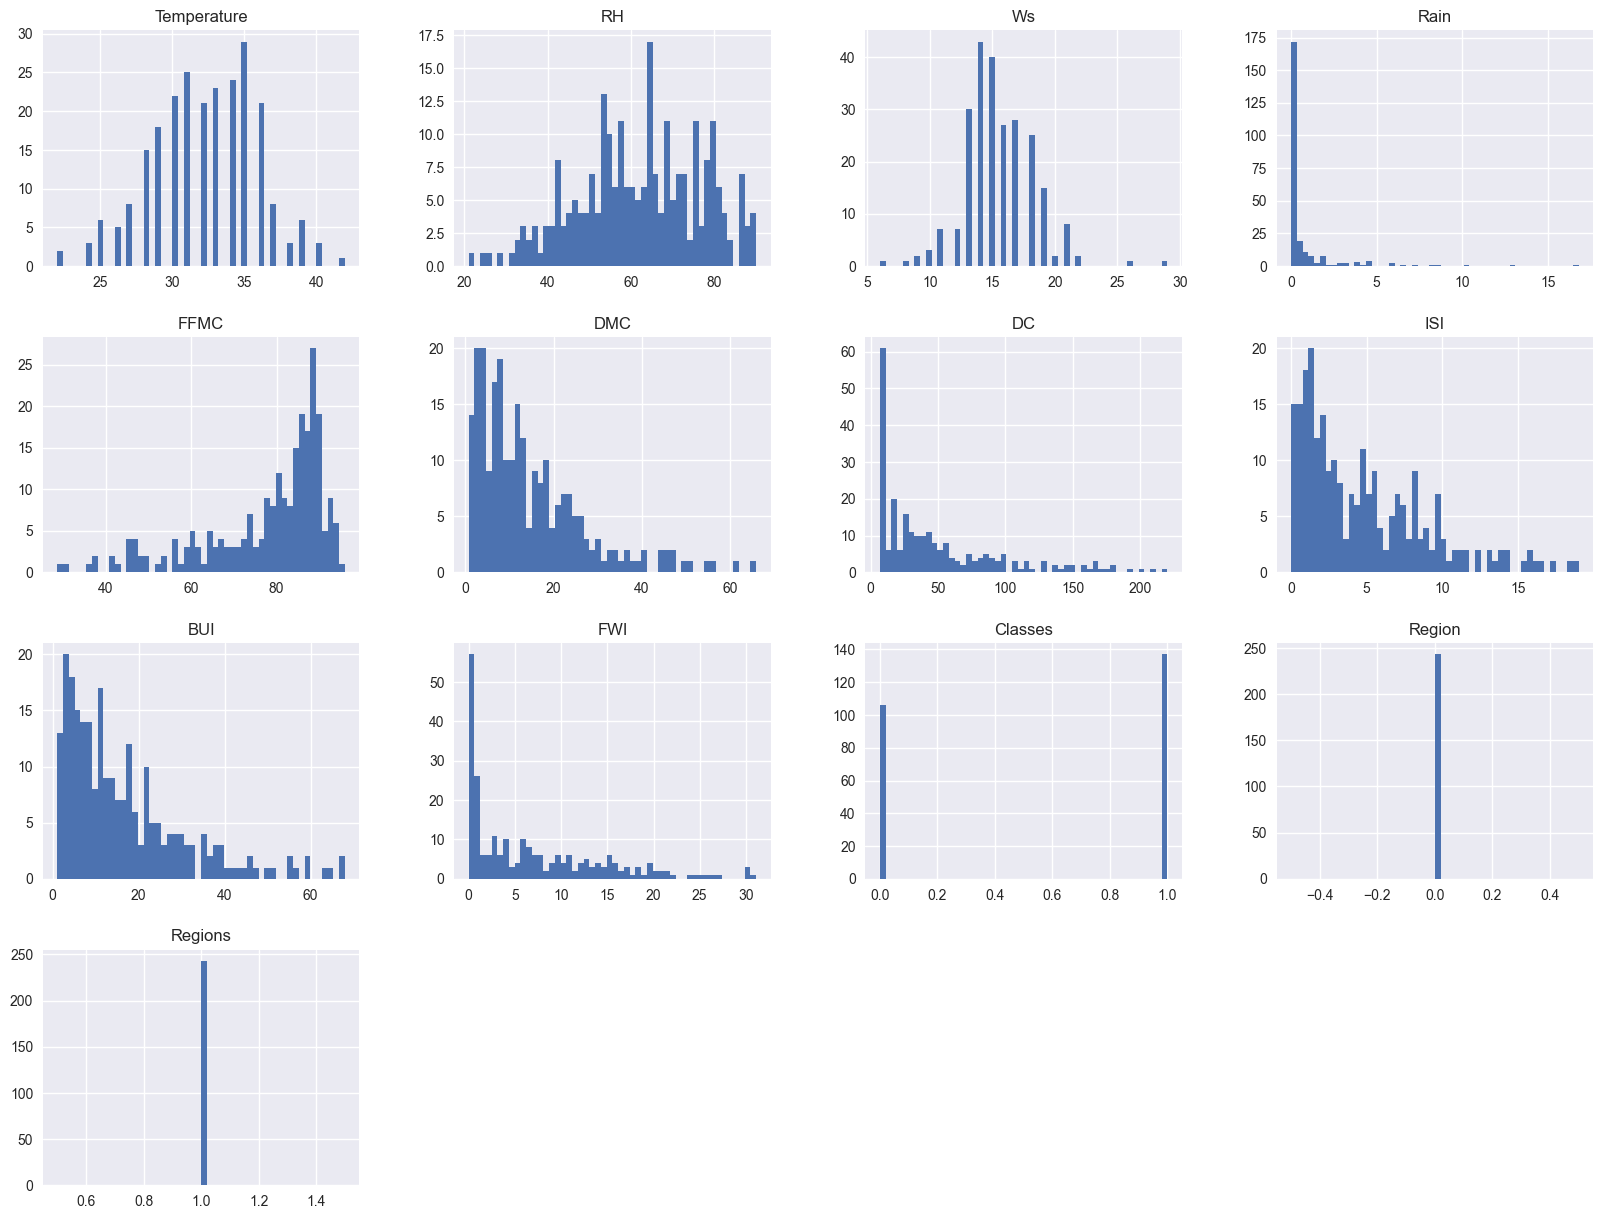

In [204]:
#plot density
plt.style.use('seaborn')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()